<a href="https://colab.research.google.com/github/Narmathan56/AI-Math-Tutor/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python --version

Python 3.12.12


##Setup


In [3]:
##Setup
!pip uninstall -y torchtext torch torchvision torchaudio









Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Successfully uninstalled torchtext-0.18.0
Found existing installation: torch 2.9.1
Uninstalling torch-2.9.1:
  Successfully uninstalled torch-2.9.1


##Version



In [4]:
!pip install torchtext==0.18.0 torch==2.3.0 -q

  Using cached torchtext-0.18.0-cp312-cp312-manylinux1_x86_64.whl.metadata (7.9 kB)
Using cached torchtext-0.18.0-cp312-cp312-manylinux1_x86_64.whl (2.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import torch
import torchtext
print(torch.__version__)
print(torchtext.__version__)


2.3.0+cu121
0.18.0+cpu


In [ ]:

import torch

if torch.cuda.is_available():
    print(f"GPU Available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available. Running on CPU.")


GPU Available: NVIDIA L4


In [ ]:
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
print(f"Current device: {torch.cuda.current_device()}")
print(f"Device name: {torch.cuda.get_device_name(0)}")

CUDA available: True
CUDA device count: 1
Current device: 0
Device name: NVIDIA A100-SXM4-40GB


In [2]:


import torch
import torchtext
import numpy as np
print("Torch version:", torch.__version__)
print("Torchtext version:", torchtext.__version__)
print("numpy",np.__version__)










Torch version: 2.3.0+cu121
Torchtext version: 0.18.0+cpu
numpy 2.0.2


In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os
import shutil

# Create .kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Copy kaggle.json from Google Drive to .kaggle
shutil.copy("/content/drive/MyDrive/kaggle.json", "/root/.kaggle/")

# Set correct permissions
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d awsaf49/MATH-dataset

In [ ]:
!unzip -n MATH-dataset.zip

In [ ]:

pip install fsspec==2023.9.2

In [ ]:
!pip install datasets==3.6.0

In [ ]:
import os
import shutil
from datasets import load_dataset, DatasetDict

# --- 1. Mount Google Drive ---
# This connects your Colab environment to your Google Drive.
# You will be prompted to authorize access.
print("Mounting Google Drive...")
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted.")

# --- 2. Install the Hugging Face 'datasets' library ---
# This is necessary to easily download the DeepMind dataset.
print("\nInstalling 'datasets' library...")
!pip install datasets
print("'datasets' library installed.")

# --- 3. Define the DeepMind Dataset and Subsets to Download ---
# The DeepMind Math Dataset is modular. You need to specify which parts you want.
# Downloading ALL subsets can take a very long time and consume a lot of space.
# Choose wisely based on your needs.
# For demonstration, we'll download a few popular ones.

deepmind_dataset_name = "deepmind/math_dataset"

# List of DeepMind subsets to download.
# You can find the full list on the Hugging Face dataset page:
# https://huggingface.co/datasets/deepmind/math_dataset
# Example: "algebra__linear_1d", "arithmetic__add_or_sub", etc.
# If you want to download all, you'd need to iterate through all possible subset names.
# For this example, let's pick a few to avoid excessively long download times.
selected_subsets = [
    "algebra__linear_1d",
    "arithmetic__mul",
    "calculus__differentiate",
    "numbers__base_conversion"
]

# --- 4. Load (Download) the Dataset Subsets to Colab's Cache ---
# When you call load_dataset, it first downloads the data to a local cache
# (usually /root/.cache/huggingface/datasets/deepmind___math_dataset/).
# We will then copy from this cache location to your Google Drive.
print(f"\nLoading (downloading) selected DeepMind Math dataset subsets to Colab's cache...")

# Dictionary to hold the loaded datasets for each subset
loaded_deepmind_data = {}

for subset in selected_subsets:
    print(f"  - Loading subset: {subset}")
    # Load all splits for the subset to ensure all files are downloaded
    try:
        # Load all splits (train-easy, train-medium, train-hard, test)
        dataset_dict = load_dataset(deepmind_dataset_name, subset)
        loaded_deepmind_data[subset] = dataset_dict
        print(f"    Loaded {subset} with splits: {list(dataset_dict.keys())}")
    except Exception as e:
        print(f"    Error loading {subset}: {e}. Skipping this subset.")

print("\nAll selected DeepMind Math dataset subsets downloaded to Colab's cache.")

# --- 5. Define Destination Path in Google Drive ---
# Choose a logical folder in your Google Drive to save the dataset.
# This folder will be created if it doesn't exist.
google_drive_destination_base = '/content/drive/MyDrive/DeepMind_Math_Dataset_Downloaded/'
os.makedirs(google_drive_destination_base, exist_ok=True)
print(f"\nDestination folder in Google Drive: {google_drive_destination_base}")

# --- 6. Copy Downloaded Files from Cache to Google Drive ---
# The Hugging Face datasets cache structure is typically:
# /root/.cache/huggingface/datasets/{dataset_name}/{subset_name}/{version}/{hash}/
# We need to find the specific data files within this structure.

# Get the default cache directory for Hugging Face datasets
hf_cache_dir = os.path.expanduser("~/.cache/huggingface/datasets")
deepmind_cache_path_prefix = os.path.join(hf_cache_dir, "deepmind___math_dataset")

print("\nCopying files to Google Drive...")

for subset in selected_subsets:
    # Construct the expected cache path for the subset
    # This part can be tricky as the exact hash part changes.
    # A more robust way is to inspect loaded_deepmind_data[subset].cache_files
    # However, for this dataset, it often creates a clear folder structure.

    # Let's try to find the actual data directory within the cache
    # This might require some inspection of the cache structure after loading
    # A common pattern is: /root/.cache/huggingface/datasets/deepmind___math_dataset/{subset_name}/{version_hash}/

    # A more reliable way to get the actual path:
    if subset in loaded_deepmind_data:
        # Get the first split (e.g., 'train') and then its cache_files
        # The cache_files list contains dictionaries with 'path'
        first_split_path = loaded_deepmind_data[subset][list(loaded_deepmind_data[subset].keys())[0]].cache_files[0]['path']

        # The actual data directory is usually the parent of the parent of the file
        # e.g., /root/.cache/huggingface/datasets/deepmind___math_dataset/algebra__linear_1d/1.0.0/hash/data/train-00000-of-00001.jsonl.gz
        # We want to copy the 'data' folder or the parent of 'data'

        # Let's find the base directory of the downloaded data for this subset
        # This might vary, so we'll try to go up until we find the subset name in the path
        current_path = os.path.dirname(first_split_path)
        while os.path.basename(current_path) != subset and current_path != '/':
            current_path = os.path.dirname(current_path)

        # The actual data is usually inside a 'data' folder or directly under the hash folder
        # For DeepMind Math, it's often directly under the hash folder, containing .jsonl.gz files
        # Let's target the folder that contains the actual data files (e.g., '1.0.0/hash/')
        # A simpler approach is to copy the entire subset folder from the cache

        # Find the specific cache directory for the subset
        # This assumes a structure like /root/.cache/huggingface/datasets/deepmind___math_dataset/algebra__linear_1d/1.0.0/some_hash/
        # We want to copy 'some_hash' folder or its contents

        # A safer approach: copy the entire dataset cache folder for the subset.
        # This will copy the '1.0.0/hash' folders as well.

        # Find the root cache directory for the specific subset
        # Example: /root/.cache/huggingface/datasets/deepmind___math_dataset/algebra__linear_1d/
        subset_cache_root = os.path.join(deepmind_cache_path_prefix, subset)

        if os.path.exists(subset_cache_root):
            destination_path = os.path.join(google_drive_destination_base, subset)
            print(f"  - Copying '{subset}' from cache to '{destination_path}'...")
            try:
                # Use copytree to copy the entire directory
                shutil.copytree(subset_cache_root, destination_path, dirs_exist_ok=True)
                print(f"    Successfully copied {subset}.")
            except Exception as e:
                print(f"    Error copying {subset}: {e}")
        else:
            print(f"    Cache directory for {subset} not found at {subset_cache_root}. Skipping copy.")
    else:
        print(f"    Dataset for {subset} was not loaded. Skipping copy.")

print("\nDeepMind Math Dataset files copied to Google Drive.")
print(f"You can now find your dataset in: {google_drive_destination_base}")
print("You can verify by navigating to this folder in your Google Drive.")

In [ ]:
subset = 'algebra__linear_1d'
split_name = 'train'

print(loaded_deepmind_data[subset][split_name].cache_files)


In [ ]:
save_dir = '/content/drive/MyDrive/DeepMind_Math_Dataset_Downloaded/'
os.makedirs(save_dir,exist_ok=True)
for subset in loaded_deepmind_data:
  for split in loaded_deepmind_data[subset]:
    dataset=loaded_deepmind_data[subset][split]
    save_path=os.path.join(save_dir,f"{subset}_{split}.json")
    print(f"Saving {subset} [{split}] to {save_path}...")
    dataset.to_json(save_path)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.listdir("drive/MyDrive/DeepMind_Math_Dataset_Downloaded")

In [ ]:
import pandas as pd
algebra_train_data=pd.read_json("/content/drive/MyDrive/DeepMind_Math_Dataset_Downloaded/algebra__linear_1d_train.json", lines=True)
algebra_test_data=pd.read_json("/content/drive/MyDrive/DeepMind_Math_Dataset_Downloaded/algebra__linear_1d_test.json", lines=True)

In [ ]:
import os
os.listdir()

In [ ]:

print(os.getcwd())  # Shows the current working directory
print(os.listdir()) # Lists available directories and files


In [ ]:
os.listdir('MATH')

In [ ]:
os.listdir('MATH/train')
os.listdir('MATH/test')

##Load the File


In [ ]:
import pandas as pd
import os
import json

# Function to read JSON files into a pandas DataFrame
def load_json_files(folder_path):
    json_files = os.listdir(folder_path)  # Get list of all JSON files in the folder

    data = []
    for file in json_files:
        if file.endswith('.json'):  # Check if the file is a JSON file
            with open(os.path.join(folder_path, file), 'r') as f:
                data.append(json.load(f))  # Load the JSON data
    return pd.DataFrame(data)  # Convert the list of JSON data into a DataFrame

# Load the data for training and testing
train_data = load_json_files("MATH/train/algebra")
test_data = load_json_files("MATH/test/algebra")

# Display the first few rows
print(train_data.head())
print(test_data.head())

##Dataset Creation
This is the part  of the dataset creation
I am using cvs file and js file to keep the Datasets.
I am using Pandas framework for access the datasets


In [5]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/one_digit_addition_varied_1000.csv')
print(data.shape)
# Assuming 'data' is your existing DataFrame
new_rows = [
    {'question': 'What is 1+1', 'steps': 'Add the ones → 1 + 1 = 2 so, Answer is 2', 'answer': '2'},
     {'question': 'What is 1 plus 1', 'steps': 'Add the ones → 1 + 1 = 2 so, Answer is 2', 'answer': '2'},
     {'question': 'What is 2+2', 'steps': 'Add the ones → 2 + 2 = 4 so, Answer is 4', 'answer': '4'},
     {'question': 'What is 2 plus 2', 'steps': 'Add the ones → 2 + 2 = 4 so, Answer is 4', 'answer': '4'},
     {'question': 'What is 3+3', 'steps': 'Add the ones → 3 + 3 = 6 so, Answer is 6', 'answer': '6'},
     {'question': 'What is 1+1', 'steps': 'Add the ones → 1 + 1 = 2 so, Answer is 2', 'answer': '2'},
     {'question': 'What is 1+1', 'steps': 'Add the ones → 1 + 1 = 2 so, Answer is 2', 'answer': '2'},
     {'question': 'What is 1+1', 'steps': 'Add the ones → 1 + 1 = 2 so, Answer is 2', 'answer': '2'},
     {'question': 'What is 1+1', 'steps': 'Add the ones → 1 + 1 = 2 so, Answer is 2', 'answer': '2'},
     {'question': 'What is 1+1', 'steps': 'Add the ones → 1 + 1 = 2 so, Answer is 2', 'answer': '2'},

]

# Convert the list of dictionaries to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append them to the existing DataFrame
data = pd.concat([data, new_rows_df], ignore_index=True)

# Print the updated DataFrame
print(data)







data=data.drop_duplicates()
print(data.shape)


X_train=data['question']
y_train = data['steps'] + " Answer: " + data['answer'].astype(str)


X_test=data['question']
y_test= data['steps'] + " Answer: " + data['answer'].astype(str)




print(y_train[30])

(1000, 3)
            question                                              steps answer
0       What is 8+8?  Step 1: Add the ones → 8 + 8 = 16. So, the ans...     16
1           7 plus 0  Step 1: Add the ones → 7 + 0 = 7. So, the answ...      7
2     Calculate 3+8.  Step 1: Add the ones → 3 + 8 = 11. So, the ans...     11
3           5 plus 1  Step 1: Add the ones → 5 + 1 = 6. So, the answ...      6
4                0+5  Step 1: Add the ones → 0 + 5 = 5. So, the answ...      5
...              ...                                                ...    ...
1005     What is 1+1           Add the ones → 1 + 1 = 2 so, Answer is 2      2
1006     What is 1+1           Add the ones → 1 + 1 = 2 so, Answer is 2      2
1007     What is 1+1           Add the ones → 1 + 1 = 2 so, Answer is 2      2
1008     What is 1+1           Add the ones → 1 + 1 = 2 so, Answer is 2      2
1009     What is 1+1           Add the ones → 1 + 1 = 2 so, Answer is 2      2

[1010 rows x 3 columns]
(647, 3)
Step 1: 

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/one_digit_addition_varied_1000.csv')
print(data.shape)

data.head()




data=data.drop_duplicates()
print(data.shape)


X_train=data['question']
y_train = data['steps'] + " Answer: " + data['answer'].astype(str)


print(y_train[30])

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/one_digit_addition_250.csv')
data.head()
data=data.drop_duplicates()
print(data.info)
X_test=data['question']
y_test= data['steps'] + " Answer: " + data['answer'].astype(str)# Ensure y_test is string type

print(X_test.head())
print(X_test.shape)
print(X_train.info)
print(X_train.shape)

##Splitting the Data
splitting the data as X_train,Y_train,X_test,Y_test.
X_train is independant variable according to math tutor this is the problems.
Y_train is dependant variable according to math tutor this is the solution we can say as Target lables.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
print(algebra_train_data.shape)
print(algebra_test_data.shape)
algebra_train_data=algebra_train_data.rename(columns={'question': 'problem', 'answer': 'solution'})
algebra_test_data=algebra_test_data.rename(columns={'question': 'problem', 'answer': 'solution'})
algebra_X_train=algebra_train_data['problem']
algebra_y_train=algebra_train_data['solution']
algebra_X_test=algebra_test_data['problem']
algebra_y_test=algebra_test_data['solution']
print(algebra_X_train.shape)
print(algebra_y_train.shape)
print(algebra_X_test.shape)
print(algebra_y_test.shape)
print(algebra_X_train.head)

In [ ]:
from sklearn.model_selection import train_test_split

print("train_data:",train_data.shape)
print("test_data:",test_data.shape)
# Example: Splitting the data into 80% training and 20% testing
X_train = train_data['problem']  # Features (e.g., text of math problems)
y_train = train_data['solution']
X_test=test_data['problem']
y_test=test_data['solution']
print("Y_train:",X_train.shape)
print("Y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)
print(X_train)
print(y_train)
print(X_test)
print(y_test)
print("Example Math Problem:", X_train.iloc[2])
print("Corresponding Solution:", y_train.iloc[1])
print("Example Math Problem:", X_test.iloc[0])
print("Corresponding Solution:", y_test.iloc[0])



##merging all **data**

In [ ]:
import pandas as pd
X_train = pd.concat([algebra_X_train, algebra_X_test])
y_train = pd.concat([algebra_y_train, algebra_y_test])
print(X_train.shape)
print(y_train.shape)
print(X_train.head())
print(y_train.head())
print(X_train.tail())

In [ ]:
# Define the desired number of samples
train_samples = 10000
test_samples = 1000

# Sample the datasets
# Use .sample() to randomly select rows
# use .reset_index(drop=True) to reset the index after sampling
X_train_sampled = X_train.sample(n=min(train_samples, len(X_train)), random_state=42).reset_index(drop=True)
y_train_sampled = y_train.sample(n=min(train_samples, len(y_train)), random_state=42).reset_index(drop=True) # Use the same random_state for consistency if needed, or sample independently

X_test_sampled = X_test.sample(n=min(test_samples, len(X_test)), random_state=42).reset_index(drop=True)
y_test_sampled = y_test.sample(n=min(test_samples, len(y_test)), random_state=42).reset_index(drop=True) # Use the same random_state for consistency if needed, or sample independently


print("Sampled X_train shape:", X_train_sampled.shape)
print("Sampled y_train shape:", y_train_sampled.shape)
print("Sampled X_test shape:", X_test_sampled.shape)
print("Sampled y_test shape:", y_test_sampled.shape)

# Now, use these sampled variables in your data cleaning cell
X_train = X_train_sampled
y_train = y_train_sampled
X_test = X_test_sampled
y_test = y_test_sampled

## Data Cleaning
We are using the Torch text for data cleaning and numeral encoding
first step data cleaning means we are consentrate on missing values,repeated values
2.tokenizing this means we have to split the text as sup part to change as numral encodings
3.numaral encodings this means if we gonna feed the data into model, first, we need to change as tensors which include some numbers that numbers created by build  vocubulary concept.
once tokenized the text after build vocubulary there are some numbers assigned with perticular text
[the:1,cat:2].
after we change to tensor


Clean → Tokenize → Encode → Tensorize ✅

In [6]:

print(type(X_train.iloc[0]))


<class 'str'>


In [7]:
import re
import pandas as pd
import torch
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
from torch.nn.functional import pad
from torch.utils.data import DataLoader
from torchtext.vocab import vocab as torch_vocab
import matplotlib.pyplot as plt


# Step 1: Clean text function
# Decode entire column first
X_train = X_train.apply(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
y_train = y_train.apply(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
X_test = X_test.apply(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
y_test = y_test.apply(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)

def clean_text(text):
    if text is None or pd.isna(text):
       return ""
   # if(text.startswith("b'")and text.endswith("'")):

       # text=text[2:-3].strip()
    # Decode bytes literal if necessary
    if isinstance(text, bytes):
        text = text.decode("utf-8")
    # Assuming UTF-8 encoding

    # Extract labels from Asymptote block before removing it
    asy_labels = re.findall(r'label\([^,]+,"([^"]+)"', text)

    # Remove entire [asy] block
    text = re.sub(r'\[asy\].*?\[/asy\]','', text, flags=re.DOTALL)



    # Remove LaTeX math mode ($...$), LaTeX commands like \mbox{}, etc.
    text = re.sub(r'\$\\?([^$]+)\\?\$', r'\1', text)
    text = re.sub(r'\\\w+\{(.*?)\}', r'\1', text)
    text = text.replace('\\', '')

    # Normalize whitespaces and math operators
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\s*([+\-*/=()^])\s*', r' \1 ', text)

    # Fix parentheses spacing
    text = re.sub(r'\s*\(\s*', '(', text)
    text = re.sub(r'\s*\)\s*', ')', text)

    # Lowercase everything
    text = text.lower()

    # Remove trailing newline characters explicitly if not removed by strip()
    text = text.rstrip('\n')


    # Add logic sentence from Asymptote if present
    if asy_labels:
        logic_steps = [label.lower() for label in asy_labels if "input" not in label and "output" not in label]
        logic_sentence = " the machine " + ", then ".join(logic_steps) + "." if logic_steps else ""

        input_value = next((label.split('=')[1].strip() for label in asy_labels if "input" in label), None)

        if input_value:
            text = f"in the function machine, the input is {input_value}. {text}{logic_sentence} what is the output?"
        else:
            text = f"{text}{logic_sentence} what is the output?"

    return text

# Step 2: Clean datasets
# we are insert the system which've already made by us
X_train_cleaned = X_train.apply(clean_text)
y_train_cleaned = y_train.astype(str).apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)
y_test_cleaned = y_test.astype(str).apply(clean_text)

print("✅ Sample Cleaned Output:", X_train_cleaned.iloc[0 :100])
print("✅ Sample Cleaned Output:", y_train_cleaned.iloc[0])
print("X_train_cleaned_type",type(X_train.iloc[0]))

# Step 3: Tokenization
tokenizer = get_tokenizer("basic_english")
X_train_tokens = X_train_cleaned.apply(tokenizer)
y_train_tokens = y_train_cleaned.apply(tokenizer)
X_test_tokens = X_test_cleaned.apply(tokenizer)
y_test_tokens = y_test_cleaned.apply(tokenizer)

# Step 4: Build vocab from all tokens
def yield_tokens(*data_parts):
    for part in data_parts:
        for tokens in part:
            yield tokens

vocab = build_vocab_from_iterator(
    yield_tokens(X_train_tokens, y_train_tokens, X_test_tokens, y_test_tokens),
    specials=["<unk>", "<pad>", "<bos>", "<eos>"],
    max_tokens=5000
)

vocab.set_default_index(vocab["<unk>"])

# Step 5: Numericalize
def numericalize(token_list, add_bos_eos=False):
    if add_bos_eos:
        token_list = ['<bos>'] + token_list + ['<eos>']
    return torch.tensor([vocab[token] for token in token_list])

X_train_ids = X_train_tokens.apply(lambda x: numericalize(x))
y_train_ids = y_train_tokens.apply(lambda x: numericalize(x, add_bos_eos=True))
X_test_ids = X_test_tokens.apply(lambda x: numericalize(x))
y_test_ids = y_test_tokens.apply(lambda x: numericalize(x, add_bos_eos=True))

# Step 6: Padding
def pad_sequences(sequences, max_len):
    padded_sequences = []
    for seq in sequences:
        # Ensure seq is a tensor before padding
        if not isinstance(seq, torch.Tensor):
            seq = torch.tensor(seq)

        current_len = seq.size(0)
        if current_len < max_len:
            padded_seq = pad(seq, (0, max_len - current_len), value=vocab["<pad>"])
        else:
            padded_seq = seq[:max_len]
        padded_sequences.append(padded_seq)

    return padded_sequences


X_train_tensor = pad_sequences(X_train_ids.tolist(), max_len=10)
y_train_tensor = pad_sequences(y_train_ids.tolist(), max_len=30)
X_test_tensor = pad_sequences(X_test_ids.tolist(), max_len=10)
y_test_tensor = pad_sequences(y_test_ids.tolist(), max_len=30)


# Step 7: Stack into final tensors
X_train_tensor = torch.stack(X_train_tensor)
y_train_tensor = torch.stack(y_train_tensor)
X_test_tensor = torch.stack(X_test_tensor)
y_test_tensor = torch.stack(y_test_tensor)


# Step 8: Output shapes
print("✅ Preprocessing Done!")
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)
print("📚 Vocabulary size:", len(vocab))
print(X_train_tensor[0])
print(y_train_tensor[0])

/usr/local/lib/python3.12/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.12/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.12/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

✅ Sample Cleaned Output: 0                what is 8 + 8?
1                      7 plus 0
2              calculate 3 + 8.
3                      5 plus 1
4                         0 + 5
                 ...           
100        can you add 8 and 0?
101                add 5 and 3.
102                    9 plus 9
103                       9 + 1
104    find the sum of 4 and 5.
Name: question, Length: 100, dtype: object
✅ Sample Cleaned Output: step 1: add the ones → 8 + 8 = 16. so, the answer is 16. answer: 16
X_train_cleaned_type <class 'str'>
✅ Preprocessing Done!
X_train_tensor shape: torch.Size([647, 10])
y_train_tensor shape: torch.Size([647, 30])
X_test_tensor shape: torch.Size([647, 10])
y_test_tensor shape: torch.Size([647, 30])
📚 Vocabulary size: 51
tensor([31, 10, 17,  8, 17, 25,  1,  1,  1,  1])
tensor([ 2, 16,  7,  9,  5, 13, 15, 17,  8, 17, 12, 48,  4, 14, 11,  5,  6, 10,
        48,  4,  6, 48,  3,  1,  1,  1,  1,  1,  1,  1])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

x = X_train_tensor[:, 0].tolist()
y = X_train_tensor[:, 1].tolist()

plt.scatter(x, y)
plt.show()

In [ ]:
ids=X_train_tensor[0]
decoded_tokens = [vocab.lookup_token(i)for i in ids if i !=vocab['<pad>']]
decoded=' '.join(decoded_tokens)
print(decoded)

In [ ]:
print(len(vocab))

In [ ]:
print("Random example:", y_train_tokens.iloc[0])
print("Token IDs:", [vocab[token] for token in y_train_tokens.iloc[0]])

##Create the DataLoaders

In [ ]:
print(X_batch.shape)
print(y_batch.shape)
print(vocab_size)

In [8]:
from torch.utils.data import TensorDataset, DataLoader

# -----------------------------
# 1️⃣ Create TensorDataset
# -----------------------------
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# -----------------------------
# 2️⃣ Create DataLoaders
# -----------------------------
batch_size = 16  # you can adjust

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# -----------------------------
# 3️⃣ Check one batch
# -----------------------------
for x_batch, y_batch in train_loader:
    print("Input batch shape:", x_batch.shape)
    print("Target batch shape:", y_batch.shape)
    break


Input batch shape: torch.Size([16, 10])
Target batch shape: torch.Size([16, 30])


#Create Transfomer Model

✅ Using device: cuda
✅ Epoch 1/26, Loss: 2.7276
✅ Epoch 2/26, Loss: 1.1731
✅ Epoch 3/26, Loss: 0.7041
✅ Epoch 4/26, Loss: 0.5335
✅ Epoch 5/26, Loss: 0.4372
✅ Epoch 6/26, Loss: 0.3739
✅ Epoch 7/26, Loss: 0.3195
✅ Epoch 8/26, Loss: 0.2725
✅ Epoch 9/26, Loss: 0.2235
✅ Epoch 10/26, Loss: 0.1794
✅ Epoch 11/26, Loss: 0.1483
✅ Epoch 12/26, Loss: 0.1245
✅ Epoch 13/26, Loss: 0.1056
✅ Epoch 14/26, Loss: 0.0924
✅ Epoch 15/26, Loss: 0.0804
✅ Epoch 16/26, Loss: 0.0723
✅ Epoch 17/26, Loss: 0.0636
✅ Epoch 18/26, Loss: 0.0576
✅ Epoch 19/26, Loss: 0.0521
✅ Epoch 20/26, Loss: 0.0501
✅ Epoch 21/26, Loss: 0.0447
✅ Epoch 22/26, Loss: 0.0408
✅ Epoch 23/26, Loss: 0.0367
✅ Epoch 24/26, Loss: 0.0358
✅ Epoch 25/26, Loss: 0.0323
✅ Epoch 26/26, Loss: 0.0295


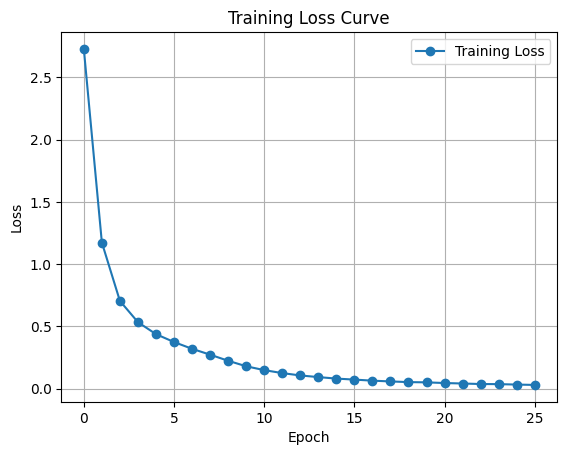

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, embed_size, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, embed_size)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * (-torch.log(torch.tensor(10000.0)) / embed_size))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]


# Transformer Model
class MathTransformer(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = PositionalEncoding(embed_size)
        self.transformer = nn.Transformer(
            d_model=embed_size,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.fc_out = nn.Linear(embed_size, vocab_size) # Use the passed vocab_size


    def forward(self, src, tgt, src_padding_mask=None, tgt_mask=None):
        src = self.embedding(src)
        src = self.positional_encoding(src)

        tgt = self.embedding(tgt)
        tgt = self.positional_encoding(tgt)

        output = self.transformer(
            src, tgt,
            src_key_padding_mask=src_padding_mask,
            tgt_mask=tgt_mask
        )
        return self.fc_out(output)

    @staticmethod
    def generate_square_subsequent_mask(sz):
        mask = torch.triu(torch.ones(sz, sz), diagonal=1).bool()
        return mask.masked_fill(mask, float('-inf')).masked_fill(~mask, float(0.0))

    @staticmethod
    def generate_padding_mask(seq, pad_token_id):
        return seq == pad_token_id

    @staticmethod
    def handle_vocab_size(X_batch, y_batch, vocab_size, unk_token=1):
        X_batch = X_batch.clone()
        y_batch = y_batch.clone()
        X_batch[X_batch >= vocab_size] = unk_token
        y_batch[y_batch >= vocab_size] = unk_token
        return X_batch, y_batch

# Dataset
class MathDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Hyperparameters
vocab_size = len(vocab) # Use the actual vocab size here
embed_size = 1024
num_heads = 32
num_layers =6
dropout = 0.1
pad_token_id = vocab["<pad>"]  # Get pad token id from vocab
num_epochs = 26


# Initialize model, loss, optimizer, scheduler
model = MathTransformer(vocab_size, embed_size, num_heads, num_layers, dropout).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=pad_token_id)
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)

# Training loop
loss_values = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Handle vocab overflow
        X_batch, y_batch = MathTransformer.handle_vocab_size(X_batch, y_batch, vocab_size)

        # Padding and masks
        src_padding_mask = MathTransformer.generate_padding_mask(X_batch, pad_token_id).to(device)
        tgt_input = y_batch[:, :-1]
        tgt_output = y_batch[:, 1:]

        tgt_mask = MathTransformer.generate_square_subsequent_mask(tgt_input.size(1)).to(device)

        # Forward pass
        optimizer.zero_grad()
        output = model(X_batch, tgt_input, src_padding_mask=src_padding_mask, tgt_mask=tgt_mask)

        # Reshape for loss
        output = output.reshape(-1, vocab_size)
        tgt_output = tgt_output.reshape(-1)

        loss = criterion(output, tgt_output)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    scheduler.step()

    print(f"✅ Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Plot loss
plt.plot(loss_values, marker='o', label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch

torch.save(model.state_dict(), "math_transformer_weights.pth")




In [10]:
import torch
from torchtext.data.metrics import bleu_score # Import bleu_score

# Define the evaluate function
def evaluate(model, dataloader, criterion, device, vocab, pad_token_id):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    correct_predictions = 0
    total_tokens = 0
    all_predicted_solutions = []
    all_target_solutions = []

    with torch.no_grad():  # Disable gradient computation during evaluation
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # Ensure batch tensors do not contain indices out of vocab range
            # Assuming the model being evaluated is MathTransformer or has a similar method
            # If not, you might need to adjust this line or handle vocab overflow differently
            X_batch, y_batch = MathTransformer.handle_vocab_size(X_batch, y_batch, len(vocab), vocab["<unk>"])

            # Padding mask (if needed for your transformer model)
            src_padding_mask = MathTransformer.generate_padding_mask(X_batch, pad_token_id).to(device)
            tgt_input = y_batch[:, :-1]  # All tokens except the last one
            tgt_output = y_batch[:, 1:]  # All tokens except the first one

            # Generate the target mask for the transformer
            tgt_mask = MathTransformer.generate_square_subsequent_mask(tgt_input.size(1)).to(device)


            # Forward pass
            output = model(X_batch, tgt_input, src_padding_mask=src_padding_mask, tgt_mask=tgt_mask)


            # Reshape for loss calculation
            output_reshaped = output.reshape(-1, len(vocab))
            tgt_output_reshaped = tgt_output.reshape(-1)


            # Calculate loss
            loss = criterion(output_reshaped, tgt_output_reshaped)
            total_loss += loss.item()

            # Calculate correct predictions (optional, depends on your task)
            _, predicted_tokens = output_reshaped.max(1)
            # We only count correct predictions for non-padding tokens in the reshaped tensors
            mask = (tgt_output_reshaped != pad_token_id)
            correct_predictions += (predicted_tokens[mask] == tgt_output_reshaped[mask]).sum().item()
            total_tokens += mask.sum().item()


            # Decode predictions and targets for BLEU score
            itos = vocab.get_itos()
            special_tokens = ["<unk>", "<pad>", "<bos>", "<eos>"]

            # Reshape predicted_tokens and tgt_output back to batch size and sequence length
            predicted_tokens_batch = predicted_tokens.view(y_batch.size(0), -1)
            tgt_output_batch = tgt_output.view(y_batch.size(0), -1)


            for i in range(y_batch.size(0)):
                predicted_seq = [itos[idx.item()] for idx in predicted_tokens_batch[i] if itos[idx.item()] not in special_tokens]
                target_seq = [itos[idx.item()] for idx in tgt_output_batch[i] if itos[idx.item()] not in special_tokens]

                # BLEU score expects a list of reference sentences for each hypothesis
                all_predicted_solutions.append(predicted_seq)
                all_target_solutions.append([target_seq]) # Wrap target_seq in a list


    # Compute the average loss and accuracy
    avg_loss = total_loss / len(dataloader)
    # Avoid division by zero if total_tokens is 0
    accuracy = correct_predictions / total_tokens if total_tokens > 0 else 0.0

    # Compute BLEU score
    # Ensure that all_predicted_solutions and all_target_solutions are not empty
    bleu = bleu_score(all_predicted_solutions, all_target_solutions) if all_predicted_solutions and all_target_solutions else 0.0


    print(f"✅ Evaluation Loss: {avg_loss:.4f}, Token Accuracy (excluding padding): {accuracy:.4f}, BLEU Score: {bleu:.4f}")
    return avg_loss, accuracy, bleu

# Define reverse_vocab
reverse_vocab = {idx: token for token, idx in vocab.get_stoi().items()}  # for torchtext Vocab


# Define the predict_solution function (copied from cell xrU9SEDH3s29)
def predict_solution(model, question, vocab, reverse_vocab, tokenizer, device, max_len_input, max_len_output, pad_token_id):
    """
    Predicts the solution to a math question using a trained Transformer model.

    Args:
        model: Trained Transformer model
        question: String, math question to solve
        vocab: Vocab object (token -> index)
        reverse_vocab: dict (index -> token) for decoding
        tokenizer: Function to tokenize the question
        device: torch.device
        max_len_input: Max length of input sequence
        max_len_output: Max length of output sequence
        pad_token_id: ID of the padding token

    Returns:
        predicted_solution: String, the model's predicted solution
    """
    model.eval()
    with torch.no_grad():
        # 1️⃣ Preprocess the question
        cleaned_question = clean_text(question)  # your text cleaning function
        tokenized_question = tokenizer(cleaned_question)
        numericalized_question = numericalize(tokenized_question)  # convert tokens -> indices

        # 2️⃣ Pad input sequence
        # padded_question = pad_sequences([numericalized_question], max_len_input)
        # Correct way to handle padding for a single sequence:
        current_len = numericalized_question.size(0)
        if current_len < max_len_input:
            padded_question_tensor = pad(numericalized_question, (0, max_len_input - current_len), value=pad_token_id)
        else:
            padded_question_tensor = numericalized_question[:max_len_input]

        input_tensor = padded_question_tensor.unsqueeze(0).to(device)


        # 3️⃣ Initialize output sequence with <bos> token
        output_sequence = [vocab["<bos>"]]
        output_tensor = torch.tensor(output_sequence, dtype=torch.long).unsqueeze(0).to(device)

        # 4️⃣ Generate tokens step by step
        for _ in range(max_len_output):
            src_padding_mask = MathTransformer.generate_padding_mask(input_tensor, pad_token_id).to(device)
            tgt_mask = MathTransformer.generate_square_subsequent_mask(output_tensor.size(1)).to(device)
            output = model(input_tensor, output_tensor, src_padding_mask=src_padding_mask, tgt_mask=tgt_mask)

            next_token_logits = output[:, -1, :]
            next_token = torch.argmax(next_token_logits, dim=-1)

            output_sequence.append(next_token.item())
            if next_token.item() == vocab["<eos>"]:
                break

            # Update output tensor for next step
            # Need to pad the output tensor as well if its length exceeds max_len_output
            output_tensor = torch.tensor(output_sequence, dtype=torch.long).unsqueeze(0).to(device)


        # 5️⃣ Decode output sequence to string, ignoring special tokens
        predicted_solution_tokens = [
            reverse_vocab[token_id]
            for token_id in output_sequence
            if reverse_vocab[token_id] not in ["<unk>", "<pad>", "<bos>", "<eos>"]
        ]
        predicted_solution = " ".join(predicted_solution_tokens)

        return predicted_solution

# Example usage:
# Evaluate the smaller model
print("Evaluating model from cell BPExx2pgGrd-...")
# Assuming model is the trained model from cell BPExx2pgGrd-
# Assuming test_loader, criterion, device, vocab, pad_token_id are defined

# Get max_len_input and max_len_output from your tensors
max_len_input = X_train_tensor.shape[1] # Or X_test_tensor.shape[1]
max_len_output = y_train_tensor.shape[1] # Or y_test_tensor.shape[1]

avg_test_loss, test_accuracy, bleu = evaluate(model, test_loader, criterion, device, vocab, vocab["<pad>"])

# Make a prediction on a test example
question_to_solve = X_test_cleaned[24] # Get the first question from the cleaned test data

predicted_solution = predict_solution(
    model,
    question_to_solve,
    vocab,
    reverse_vocab,
    tokenizer,
    device,
    max_len_input,
    max_len_output,
    vocab["<pad>"]
)

print(f"\nQuestion: {question_to_solve}")
print(f"Predicted Solution: {predicted_solution}")
print(f"Actual Solution: {y_test_cleaned.iloc[24]}") # Assuming y_test_cleaned is available

Evaluating model from cell BPExx2pgGrd-...


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:408: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


✅ Evaluation Loss: 0.0821, Token Accuracy (excluding padding): 0.9787, BLEU Score: 0.9428

Question: add 4 and 2.
Predicted Solution: step 1 add the ones → 2 + 4 = 6 . so , the answer is 6 . answer 6
Actual Solution: step 1: add the ones → 4 + 2 = 6. so, the answer is 6. answer: 6


In [15]:
def predict_solution(model, question, vocab, tokenizer, device, max_len_input, max_len_output, pad_token_id):
    model.eval()
    with torch.no_grad():
        # Preprocess the input question
        cleaned_question = clean_text(question)
        tokenized_question = tokenizer(cleaned_question)
        numericalized_question = numericalize(tokenized_question)

        # Pad the input tensor
        padded_question = pad_sequences([numericalized_question], max_len_input)
        input_tensor = torch.stack(padded_question, dim=0).to(device) # Stack the list of tensors

        # Initialize the output sequence with the beginning-of-sequence token
        # Assuming <bos> is the start token and its index is 2 based on your previous output
        output_sequence = [vocab["<bos>"]]
        output_tensor = torch.tensor(output_sequence, dtype=torch.long).unsqueeze(0).to(device)

        # Generate the solution token by token
        for _ in range(max_len_output):
            # Generate masks
            src_padding_mask = MathTransformer.generate_padding_mask(input_tensor, pad_token_id).to(device) # Pass pad_token_id
            tgt_mask = MathTransformer.generate_square_subsequent_mask(output_tensor.size(1)).to(device)

            # Get the model's output
            output = model(input_tensor, output_tensor, src_padding_mask=src_padding_mask, tgt_mask=tgt_mask)

            # Predict the next token (using the last token's output)
            next_token_logits = output[:, -1, :]
            next_token = torch.argmax(next_token_logits, dim=-1)

            # Append the predicted token to the output sequence
            output_sequence.append(next_token.item())

            # If the predicted token is the end-of-sequence token, stop generating
            if next_token.item() == vocab["<eos>"]:
                break

            # Update the output tensor for the next iteration
            output_tensor = torch.tensor(output_sequence, dtype=torch.long).unsqueeze(0).to(device)


        # Decode the output token IDs back to words
        # Assuming the vocabulary object has an itos method
        itos = vocab.get_itos()
        predicted_solution_tokens = [itos[token_id] for token_id in output_sequence]

        # Remove special tokens for the final answer
        # Define special_tokens if it's not already defined
        special_tokens = ["<unk>", "<pad>", "<bos>", "<eos>"]
        predicted_solution = " ".join([token for token in predicted_solution_tokens if token not in special_tokens])


        return predicted_solution

# Example usage:
question_to_solve = "what is the calculation of  1+7"  # Replace with the question you want to ask

# Assuming max_len_input and max_len_output are available from your padding step
# If not, you might need to define them based on your data's characteristics
max_len_input = X_train_tensor.shape[1] # Or a value that makes sense for new input
max_len_output = 1200 # Or a value that makes sense for the expected solution length


predicted_solution = predict_solution(
    model,
    question_to_solve,
    vocab,
    tokenizer,
    device,
    max_len_input,
    max_len_output,
    vocab["<pad>"]
)

print(f"Question: {question_to_solve}")
print(f"Predicted Solution: {predicted_solution}")

Question: what is the calculation of  1+7
Predicted Solution: step 1 add the ones → 1 + 7 = 8 . so , the answer is 8 . answer 8


In [ ]:
def predict_solution(model, question, vocab, tokenizer, device, max_len_input, max_len_output, pad_token_id):
    model.eval()
    with torch.no_grad():
        # Preprocess the input question
        cleaned_question = clean_text(question)
        tokenized_question = tokenizer(cleaned_question)
        numericalized_question = numericalize(tokenized_question)

        # Pad the input tensor
        padded_question = pad_sequences([numericalized_question], max_len_input)
        input_tensor = torch.stack(padded_question, dim=0).to(device) # Stack the list of tensors

        # Initialize the output sequence with the beginning-of-sequence token
        # Assuming <bos> is the start token and its index is 2 based on your previous output
        output_sequence = [vocab["<bos>"]]
        output_tensor = torch.tensor(output_sequence, dtype=torch.long).unsqueeze(0).to(device)

        # Generate the solution token by token
        for _ in range(max_len_output):
            # Generate masks
            src_padding_mask = SmallerMathTransformer.generate_padding_mask(input_tensor, pad_token_id).to(device) # Pass pad_token_id
            tgt_mask = SmallerMathTransformer.generate_square_subsequent_mask(output_tensor.size(1)).to(device)

            # Get the model's output
            output = model(input_tensor, output_tensor, src_padding_mask=src_padding_mask, tgt_mask=tgt_mask)

            # Predict the next token (using the last token's output)
            next_token_logits = output[:, -1, :]
            next_token = torch.argmax(next_token_logits, dim=-1)

            # Append the predicted token to the output sequence
            output_sequence.append(next_token.item())

            # If the predicted token is the end-of-sequence token, stop generating
            if next_token.item() == vocab["<eos>"]:
                break

            # Update the output tensor for the next iteration
            output_tensor = torch.tensor(output_sequence, dtype=torch.long).unsqueeze(0).to(device)


        # Decode the output token IDs back to words
        # Assuming the vocabulary object has an itos method
        itos = vocab.get_itos()
        predicted_solution_tokens = [itos[token_id] for token_id in output_sequence]

        # Remove special tokens for the final answer
        # Define special_tokens if it's not already defined
        special_tokens = ["<unk>", "<pad>", "<bos>", "<eos>"]
        predicted_solution = " ".join([token for token in predicted_solution_tokens if token not in special_tokens])


        return predicted_solution

# Example usage:
question_to_solve = "5+3"  # Replace with the question you want to ask

# Assuming max_len_input and max_len_output are available from your padding step
# If not, you might need to define them based on your data's characteristics
max_len_input = X_train_tensor.shape[1] # Or a value that makes sense for new input
max_len_output = 1200 # Or a value that makes sense for the expected solution length


predicted_solution = predict_solution(
    smaller_model,
    question_to_solve,
    vocab,
    tokenizer,
    device,
    max_len_input,
    max_len_output,
    vocab["<pad>"]
)

print(f"Question: {question_to_solve}")
print(f"Predicted Solution: {predicted_solution}")

In [ ]:
pip install scikit-learn==1.2.2 numpy==1.24.3 scipy==1.10.1

In [ ]:
!pip install numpy==1.24.3 scipy==1.10.1 scikit-learn==1.2.2

In [ ]:
# Define the desired number of samples
train_samples = 10000
test_samples = 1000

# Sample the datasets
# Use .sample() to randomly select rows
# use .reset_index(drop=True) to reset the index after sampling
X_train_sampled = X_train.sample(n=min(train_samples, len(X_train)), random_state=42).reset_index(drop=True)
y_train_sampled = y_train.sample(n=min(train_samples, len(y_train)), random_state=42).reset_index(drop=True) # Use the same random_state for consistency if needed, or sample independently

X_test_sampled = X_test.sample(n=min(test_samples, len(X_test)), random_state=42).reset_index(drop=True)
y_test_sampled = y_test.sample(n=min(test_samples, len(y_test)), random_state=42).reset_index(drop=True) # Use the same random_state for consistency if needed, or sample independently


print("Sampled X_train shape:", X_train_sampled.shape)
print("Sampled y_train shape:", y_train_sampled.shape)
print("Sampled X_test shape:", X_test_sampled.shape)
print("Sampled y_test shape:", y_test_sampled.shape)

# Now, use these sampled variables in your data cleaning cell
X_train = X_train_sampled
y_train = y_train_sampled
X_test = X_test_sampled
y_test = y_test_sampled

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Device setup (re-using the previous device)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# Positional Encoding (re-using the previous class)
class PositionalEncoding(nn.Module):
    def __init__(self, embed_size, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, embed_size)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, embed_size, 2).float() * (-torch.log(torch.tensor(10000.0)) / embed_size))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * position * div_term) # Corrected
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# Smaller Transformer Model with adjustable parameters
class SmallerMathTransformer(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_encoder_layers, num_decoder_layers, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = PositionalEncoding(embed_size)
        self.transformer = nn.Transformer(
            d_model=embed_size,
            nhead=num_heads,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dropout=dropout,
            batch_first=True
        )
        self.fc_out = nn.Linear(embed_size, vocab_size)

    def forward(self, src, tgt, src_padding_mask=None, tgt_mask=None):
        src = self.embedding(src)
        src = self.positional_encoding(src)

        tgt = self.embedding(tgt)
        tgt = self.positional_encoding(tgt)

        output = self.transformer(
            src, tgt,
            src_key_padding_mask=src_padding_mask,
            tgt_mask=tgt_mask
        )
        return self.fc_out(output)

    @staticmethod
    def generate_square_subsequent_mask(sz):
        mask = torch.triu(torch.ones(sz, sz), diagonal=1).bool()
        return mask.masked_fill(mask, float('-inf')).masked_fill(~mask, float(0.0))

    @staticmethod
    def generate_padding_mask(seq, pad_token_id):
        return seq == pad_token_id

    @staticmethod
    def handle_vocab_size(X_batch, y_batch, vocab_size, unk_token=1):
        X_batch = X_batch.clone()
        y_batch = y_batch.clone()
        X_batch[X_batch >= vocab_size] = unk_token
        y_batch[y_batch >= vocab_size] = unk_token
        return X_batch, y_batch

# Hyperparameters for the smaller model
# You can adjust these values to experiment with different sizes
smaller_embed_size = 128  # Reduced embedding size
smaller_num_heads = 4      # Reduced number of attention heads
smaller_num_layers = 2     # Reduced number of encoder/decoder layers
smaller_dropout = 0.1      # Dropout rate

# Initialize the smaller model
smaller_model = SmallerMathTransformer(
    vocab_size=len(vocab),  # Using the vocabulary size from the previous step
    embed_size=smaller_embed_size,
    num_heads=smaller_num_heads,
    num_encoder_layers=smaller_num_layers,
    num_decoder_layers=smaller_num_layers,
    dropout=smaller_dropout
).to(device)

# Loss function and optimizer (can be the same as before)
criterion = nn.CrossEntropyLoss(ignore_index=vocab["<pad>"])
optimizer = optim.Adam(smaller_model.parameters(), lr=1e-5, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8) # Or adjust as needed

# Training loop (similar to the previous one, but using smaller_model)
smaller_loss_values = []
num_epochs = 5 # You might want to train for more epochs with a smaller model initially

print("\nStarting training for the smaller model...")
for epoch in range(num_epochs):
    smaller_model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Handle vocab overflow
        X_batch, y_batch = SmallerMathTransformer.handle_vocab_size(X_batch, y_batch, len(vocab), vocab["<unk>"])

        # Padding and masks
        src_padding_mask = SmallerMathTransformer.generate_padding_mask(X_batch, vocab["<pad>"]).to(device)
        tgt_input = y_batch[:, :-1]
        tgt_output = y_batch[:, 1:]

        tgt_mask = SmallerMathTransformer.generate_square_subsequent_mask(tgt_input.size(1)).to(device)

        # Forward pass
        optimizer.zero_grad()
        output = smaller_model(X_batch, tgt_input, src_padding_mask=src_padding_mask, tgt_mask=tgt_mask)

        # Reshape for loss
        output = output.reshape(-1, len(vocab))
        tgt_output = tgt_output.reshape(-1)

        loss = criterion(output, tgt_output)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(smaller_model.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    smaller_loss_values.append(avg_loss)
    scheduler.step()

    print(f"✅ Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Plot loss for the smaller model
plt.plot(smaller_loss_values, marker='o', label="Smaller Model Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Smaller Model Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

print("\nTraining of the smaller model completed.")

In [ ]:
# Evaluate the smaller model
smaller_model.eval()  # Set the model to evaluation mode
total_test_loss = 0

with torch.no_grad():  # Disable gradient computation during evaluation
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Handle vocab overflow
        X_batch, y_batch = SmallerMathTransformer.handle_vocab_size(X_batch, y_batch, len(vocab), vocab["<unk>"])

        # Padding mask
        src_padding_mask = SmallerMathTransformer.generate_padding_mask(X_batch, vocab["<pad>"]).to(device)
        tgt_input = y_batch[:, :-1]  # All tokens except the last one
        tgt_output = y_batch[:, 1:]  # All tokens except the first one

        # Generate the target mask for the transformer
        tgt_mask = SmallerMathTransformer.generate_square_subsequent_mask(tgt_input.size(1)).to(device)

        # Forward pass
        output = smaller_model(X_batch, tgt_input, src_padding_mask=src_padding_mask, tgt_mask=tgt_mask)

        # Reshape for loss calculation
        output = output.reshape(-1, len(vocab))
        tgt_output = tgt_output.reshape(-1)

        # Calculate loss
        loss = criterion(output, tgt_output)
        total_test_loss += loss.item()

avg_test_loss = total_test_loss / len(test_loader)

print(f"✅ Smaller Model Evaluation Loss: {avg_test_loss:.4f}")

In [ ]:
# 2️⃣ Pad input sequence
padded_question = pad_sequences([numericalized_question], max_len_input)

# Ensure it’s numeric
try:
    import numpy as np
    padded_question = np.array(padded_question, dtype=int)
except:
    # fallback for nested list
    padded_question = [list(map(int, seq)) for seq in padded_question]

input_tensor = torch.tensor(padded_question, dtype=torch.long).to(device)
if input_tensor.dim() == 1:
    input_tensor = input_tensor.unsqueeze(0)


In [ ]:



reverse_vocab = {idx: token for token, idx in vocab.get_stoi().items()}  # for torchtext Vocab

def predict_solution(model, question, vocab, reverse_vocab, tokenizer, device, max_len_input, max_len_output, pad_token_id):
    """
    Predicts the solution to a math question using a trained Transformer model.

    Args:
        model: Trained Transformer model
        question: String, math question to solve
        vocab: Vocab object (token -> index)
        reverse_vocab: dict (index -> token) for decoding
        tokenizer: Function to tokenize the question
        device: torch.device
        max_len_input: Max length of input sequence
        max_len_output: Max length of output sequence
        pad_token_id: ID of the padding token

    Returns:
        predicted_solution: String, the model's predicted solution
    """
    model.eval()
    with torch.no_grad():
        # 1️⃣ Preprocess the question
        cleaned_question = clean_text(question)  # your text cleaning function
        tokenized_question = tokenizer(cleaned_question)
        numericalized_question = numericalize(tokenized_question)  # convert tokens -> indices

        # 2️⃣ Pad input sequence
        padded_question = pad_sequences([numericalized_question], max_len_input)
        input_tensor = torch.tensor(padded_question, dtype=torch.long).to(device)
        if input_tensor.dim() == 1:
            input_tensor = input_tensor.unsqueeze(0)

        # 3️⃣ Initialize output sequence with <bos> token
        output_sequence = [vocab["<bos>"]]
        output_tensor = torch.tensor(output_sequence, dtype=torch.long).unsqueeze(0).to(device)

        # 4️⃣ Generate tokens step by step
        for _ in range(max_len_output):
            src_padding_mask = SmallerMathTransformer.generate_padding_mask(input_tensor, pad_token_id).to(device)
            tgt_mask = SmallerMathTransformer.generate_square_subsequent_mask(output_tensor.size(1)).to(device)
            output = model(input_tensor, output_tensor, src_padding_mask=src_padding_mask, tgt_mask=tgt_mask)

            next_token_logits = output[:, -1, :]
            next_token = torch.argmax(next_token_logits, dim=-1)

            output_sequence.append(next_token.item())
            if next_token.item() == vocab["<eos>"]:
                break

            # Update output tensor for next step
            output_tensor = torch.tensor(output_sequence, dtype=torch.long).unsqueeze(0).to(device)

        # 5️⃣ Decode output sequence to string, ignoring special tokens
        predicted_solution_tokens = [
            reverse_vocab[token_id]
            for token_id in output_sequence
            if reverse_vocab[token_id] not in ["<unk>", "<pad>", "<bos>", "<eos>"]
        ]
        predicted_solution = " ".join(predicted_solution_tokens)

        return predicted_solution

# --------------------------
# Example usage
# --------------------------
question_to_solve = "5 + 3"
max_len_input = X_train_tensor.shape[1]
max_len_output = 100  # you can adjust based on expected solution length

predicted_solution = predict_solution(
    smaller_model,
    question_to_solve,
    vocab,
    reverse_vocab,  # ✅ reverse_vocab must be defined as {index: token}
    tokenizer,
    device,
    max_len_input,
    max_len_output,
    vocab["<pad>"]
)

print(f"Question: {question_to_solve}")
print(f"Predicted Solution: {predicted_solution}")

